In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Data preprocessing

data.shape

(284807, 31)

In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
# Balance the dataset 
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class']==0]

In [10]:
data.Class.unique()

array([0, 1], dtype=int64)

In [11]:
fraud.shape

(492, 31)

In [12]:
non_fraud.shape

(284315, 31)

In [13]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [14]:
# Random Selection of Samples

non_fraud_t = non_fraud.sample(492)
non_fraud_t.shape

(492, 31)

In [15]:
# merging the dataset

dataset = fraud.append(non_fraud_t, ignore_index = True)
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,136256.0,-1.736387,0.371651,-2.613364,-0.375851,-5.141945,2.189745,3.613536,0.447015,0.023627,...,-0.383799,-0.334345,0.826772,-0.294329,-2.429311,-0.203181,0.352128,-0.329308,947.30,0
980,41825.0,1.130716,-0.178140,1.146394,1.164118,-0.875509,0.276210,-0.748999,0.324903,0.834770,...,-0.045425,-0.017891,-0.043995,-0.031573,0.387649,-0.401863,0.060416,0.022266,9.99,0
981,36828.0,1.242076,-0.000332,0.426285,0.766832,-0.354514,-0.253706,-0.114326,-0.094540,0.577372,...,-0.131173,-0.121592,-0.151099,-0.065539,0.640046,0.440901,-0.012111,0.009846,16.22,0
982,144025.0,1.975080,-0.324180,-1.597513,0.122396,0.206322,-0.714376,0.191704,-0.304081,0.417327,...,0.244203,0.642116,-0.020260,0.559198,0.084019,0.768235,-0.103949,-0.052251,76.36,0


In [16]:
dataset['Class'].value_counts()

# finally created balanced dataset

0    492
1    492
Name: Class, dtype: int64

In [17]:
# matrix of features

x = dataset.drop(labels = ['Class'], axis = 1)
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,136256.0,-1.736387,0.371651,-2.613364,-0.375851,-5.141945,2.189745,3.613536,0.447015,0.023627,...,-1.504967,-0.383799,-0.334345,0.826772,-0.294329,-2.429311,-0.203181,0.352128,-0.329308,947.30
980,41825.0,1.130716,-0.178140,1.146394,1.164118,-0.875509,0.276210,-0.748999,0.324903,0.834770,...,-0.187916,-0.045425,-0.017891,-0.043995,-0.031573,0.387649,-0.401863,0.060416,0.022266,9.99
981,36828.0,1.242076,-0.000332,0.426285,0.766832,-0.354514,-0.253706,-0.114326,-0.094540,0.577372,...,-0.045044,-0.131173,-0.121592,-0.151099,-0.065539,0.640046,0.440901,-0.012111,0.009846,16.22
982,144025.0,1.975080,-0.324180,-1.597513,0.122396,0.206322,-0.714376,0.191704,-0.304081,0.417327,...,-0.002556,0.244203,0.642116,-0.020260,0.559198,0.084019,0.768235,-0.103949,-0.052251,76.36


In [18]:
y = dataset['Class']
y

0      1
1      1
2      1
3      1
4      1
      ..
979    0
980    0
981    0
982    0
983    0
Name: Class, Length: 984, dtype: int64

In [19]:
x.shape, y.shape

((984, 30), (984,))

In [20]:
# train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                   test_size = 0.2,
                                                   random_state = 0)

In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((787, 30), (197, 30), (787,), (197,))

In [22]:
# Apply Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test) 

In [23]:
x_train

array([[ 0.69278689,  0.81189836, -0.40058377, ..., -0.15414212,
        -0.24299458, -0.38155809],
       [-0.78423279,  0.50055878, -0.09163221, ...,  0.47884937,
         0.62327288, -0.46436712],
       [-0.82024924,  0.18250914,  0.10439522, ...,  0.31830857,
         0.46901138, -0.46327753],
       ...,
       [ 0.58291032,  0.78189968, -0.68061265, ..., -0.09018248,
        -0.20528177, -0.33302582],
       [ 1.50827327,  0.24460934, -0.12147467, ..., -0.43583156,
         0.18840308, -0.41333787],
       [ 0.55838503,  0.78973963, -0.44244335, ..., -0.14105031,
        -0.20608235, -0.46096215]])

In [24]:
x_test

array([[-0.45242159,  0.57336622, -0.59259199, ...,  0.07922548,
        -0.03386986, -0.35060445],
       [ 1.60547083,  0.72450186, -0.43356675, ..., -0.04429668,
        -0.32857159, -0.42797465],
       [-1.66027963,  0.14096604,  0.52801986, ...,  1.48187093,
         1.46284757, -0.44021891],
       ...,
       [-1.59651597, -0.39300903,  1.60164467, ...,  1.20725127,
         1.48506457, -0.44021891],
       [-0.47095336,  0.56203012, -0.67713652, ...,  0.00752892,
        -0.04440406,  0.20477379],
       [ 1.69359174,  0.23567377, -0.06710852, ...,  0.08976354,
         0.21843995, -0.24980626]])

In [25]:
y_train =  y_train.to_numpy()
y_train

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,

In [26]:
y_test = y_test.to_numpy()
y_test

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [27]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [28]:
# reshaping teh dataset

x_train = x_train.reshape(787, 30, 1)
x_test = x_test.reshape(197, 30, 1)

In [29]:
x_train.shape, x_test.shape

((787, 30, 1), (197, 30, 1))

In [30]:
## Building the model

model = tf.keras.models.Sequential()


In [31]:
# add first CNN layer

model.add(tf.keras.layers.Conv1D(filters = 32,
                                kernel_size = 2,
                                padding = 'same',
                                activation = 'relu',
                                input_shape = (30,1)))

# Batch Normalization - specified to fight against internal covariance shift problem, 
# due to this normalization the speed, performance and stability of the model increases

model.add(tf.keras.layers.BatchNormalization())


# MaxPool Layer

model.add(tf.keras.layers.MaxPool1D(pool_size = 2))


# Dropout layer

model.add(tf.keras.layers.Dropout(0.2))


#

In [32]:
# Adding second CNN layer

model.add(tf.keras.layers.Conv1D(filters = 64,
                                activation = 'relu',
                                kernel_size = 3,
                                padding = 'same'))

# Batch Normalization

model.add(tf.keras.layers.BatchNormalization())


# Maxpool layer

model.add(tf.keras.layers.MaxPool1D(pool_size = 2))


# dropout layer

model.add(tf.keras.layers.Dropout(0.3))

In [33]:
# Adding Flatten Layer - converts array to vector

model.add(tf.keras.layers.Flatten())

In [34]:
# First Dense layer (fully connected layer)

model.add(tf.keras.layers.Dense(units = 64, 
                                activation = 'relu'))

# dropout layer

model.add(tf.keras.layers.Dropout(0.3))



In [35]:
# output layer

model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 30, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 32)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 15, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 15, 64)            6208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 7, 64)             0

In [37]:
# Compiling the model

opt = tf.keras.optimizers.Adam(learning_rate = 0.0001)

model.compile(optimizer = opt, 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [38]:
# Model Evaluation and prediction

hist = model.fit(x_train, y_train, 
                 epochs = 500,
                 validation_data = (x_test, y_test),
                 verbose = 2)

Epoch 1/500
25/25 - 1s - loss: 0.8287 - accuracy: 0.5858 - val_loss: 0.6487 - val_accuracy: 0.8274
Epoch 2/500
25/25 - 0s - loss: 0.5079 - accuracy: 0.7713 - val_loss: 0.6080 - val_accuracy: 0.9036
Epoch 3/500
25/25 - 0s - loss: 0.4280 - accuracy: 0.8158 - val_loss: 0.5703 - val_accuracy: 0.8883
Epoch 4/500
25/25 - 0s - loss: 0.3784 - accuracy: 0.8424 - val_loss: 0.5308 - val_accuracy: 0.8680
Epoch 5/500
25/25 - 0s - loss: 0.3794 - accuracy: 0.8564 - val_loss: 0.4963 - val_accuracy: 0.8680
Epoch 6/500
25/25 - 0s - loss: 0.3149 - accuracy: 0.8755 - val_loss: 0.4630 - val_accuracy: 0.8629
Epoch 7/500
25/25 - 0s - loss: 0.3183 - accuracy: 0.8780 - val_loss: 0.4277 - val_accuracy: 0.8629
Epoch 8/500
25/25 - 0s - loss: 0.3272 - accuracy: 0.8666 - val_loss: 0.3957 - val_accuracy: 0.8680
Epoch 9/500
25/25 - 0s - loss: 0.3000 - accuracy: 0.8856 - val_loss: 0.3631 - val_accuracy: 0.8883
Epoch 10/500
25/25 - 0s - loss: 0.2774 - accuracy: 0.8958 - val_loss: 0.3340 - val_accuracy: 0.9036
Epoch 11/

25/25 - 0s - loss: 0.1506 - accuracy: 0.9377 - val_loss: 0.1331 - val_accuracy: 0.9492
Epoch 84/500
25/25 - 0s - loss: 0.1488 - accuracy: 0.9428 - val_loss: 0.1339 - val_accuracy: 0.9492
Epoch 85/500
25/25 - 0s - loss: 0.1573 - accuracy: 0.9441 - val_loss: 0.1331 - val_accuracy: 0.9492
Epoch 86/500
25/25 - 0s - loss: 0.1327 - accuracy: 0.9517 - val_loss: 0.1341 - val_accuracy: 0.9492
Epoch 87/500
25/25 - 0s - loss: 0.1277 - accuracy: 0.9530 - val_loss: 0.1350 - val_accuracy: 0.9492
Epoch 88/500
25/25 - 0s - loss: 0.1468 - accuracy: 0.9479 - val_loss: 0.1349 - val_accuracy: 0.9492
Epoch 89/500
25/25 - 0s - loss: 0.1503 - accuracy: 0.9466 - val_loss: 0.1355 - val_accuracy: 0.9492
Epoch 90/500
25/25 - 0s - loss: 0.1484 - accuracy: 0.9441 - val_loss: 0.1360 - val_accuracy: 0.9492
Epoch 91/500
25/25 - 0s - loss: 0.1339 - accuracy: 0.9492 - val_loss: 0.1359 - val_accuracy: 0.9492
Epoch 92/500
25/25 - 0s - loss: 0.1486 - accuracy: 0.9390 - val_loss: 0.1365 - val_accuracy: 0.9492
Epoch 93/500


Epoch 165/500
25/25 - 0s - loss: 0.1051 - accuracy: 0.9543 - val_loss: 0.1455 - val_accuracy: 0.9543
Epoch 166/500
25/25 - 0s - loss: 0.1124 - accuracy: 0.9581 - val_loss: 0.1459 - val_accuracy: 0.9543
Epoch 167/500
25/25 - 0s - loss: 0.1106 - accuracy: 0.9632 - val_loss: 0.1455 - val_accuracy: 0.9543
Epoch 168/500
25/25 - 0s - loss: 0.1068 - accuracy: 0.9644 - val_loss: 0.1472 - val_accuracy: 0.9543
Epoch 169/500
25/25 - 0s - loss: 0.1018 - accuracy: 0.9619 - val_loss: 0.1478 - val_accuracy: 0.9543
Epoch 170/500
25/25 - 0s - loss: 0.1089 - accuracy: 0.9593 - val_loss: 0.1461 - val_accuracy: 0.9543
Epoch 171/500
25/25 - 0s - loss: 0.1065 - accuracy: 0.9581 - val_loss: 0.1455 - val_accuracy: 0.9543
Epoch 172/500
25/25 - 0s - loss: 0.1012 - accuracy: 0.9606 - val_loss: 0.1448 - val_accuracy: 0.9543
Epoch 173/500
25/25 - 0s - loss: 0.0976 - accuracy: 0.9695 - val_loss: 0.1444 - val_accuracy: 0.9543
Epoch 174/500
25/25 - 0s - loss: 0.1096 - accuracy: 0.9504 - val_loss: 0.1429 - val_accurac

25/25 - 0s - loss: 0.0891 - accuracy: 0.9695 - val_loss: 0.1626 - val_accuracy: 0.9442
Epoch 247/500
25/25 - 0s - loss: 0.0872 - accuracy: 0.9708 - val_loss: 0.1599 - val_accuracy: 0.9492
Epoch 248/500
25/25 - 0s - loss: 0.0885 - accuracy: 0.9695 - val_loss: 0.1599 - val_accuracy: 0.9492
Epoch 249/500
25/25 - 0s - loss: 0.0763 - accuracy: 0.9759 - val_loss: 0.1602 - val_accuracy: 0.9492
Epoch 250/500
25/25 - 0s - loss: 0.0819 - accuracy: 0.9670 - val_loss: 0.1600 - val_accuracy: 0.9492
Epoch 251/500
25/25 - 0s - loss: 0.0819 - accuracy: 0.9720 - val_loss: 0.1605 - val_accuracy: 0.9543
Epoch 252/500
25/25 - 0s - loss: 0.0776 - accuracy: 0.9720 - val_loss: 0.1592 - val_accuracy: 0.9543
Epoch 253/500
25/25 - 0s - loss: 0.0814 - accuracy: 0.9670 - val_loss: 0.1594 - val_accuracy: 0.9492
Epoch 254/500
25/25 - 0s - loss: 0.0782 - accuracy: 0.9733 - val_loss: 0.1591 - val_accuracy: 0.9492
Epoch 255/500
25/25 - 0s - loss: 0.0834 - accuracy: 0.9708 - val_loss: 0.1599 - val_accuracy: 0.9492
Epoc

Epoch 328/500
25/25 - 0s - loss: 0.0566 - accuracy: 0.9797 - val_loss: 0.1676 - val_accuracy: 0.9543
Epoch 329/500
25/25 - 0s - loss: 0.0658 - accuracy: 0.9759 - val_loss: 0.1679 - val_accuracy: 0.9543
Epoch 330/500
25/25 - 0s - loss: 0.0634 - accuracy: 0.9822 - val_loss: 0.1692 - val_accuracy: 0.9543
Epoch 331/500
25/25 - 0s - loss: 0.0514 - accuracy: 0.9822 - val_loss: 0.1694 - val_accuracy: 0.9543
Epoch 332/500
25/25 - 0s - loss: 0.0679 - accuracy: 0.9746 - val_loss: 0.1697 - val_accuracy: 0.9492
Epoch 333/500
25/25 - 0s - loss: 0.0623 - accuracy: 0.9733 - val_loss: 0.1704 - val_accuracy: 0.9492
Epoch 334/500
25/25 - 0s - loss: 0.0556 - accuracy: 0.9835 - val_loss: 0.1707 - val_accuracy: 0.9492
Epoch 335/500
25/25 - 0s - loss: 0.0573 - accuracy: 0.9759 - val_loss: 0.1732 - val_accuracy: 0.9492
Epoch 336/500
25/25 - 0s - loss: 0.0682 - accuracy: 0.9784 - val_loss: 0.1729 - val_accuracy: 0.9492
Epoch 337/500
25/25 - 0s - loss: 0.0565 - accuracy: 0.9771 - val_loss: 0.1724 - val_accurac

25/25 - 0s - loss: 0.0503 - accuracy: 0.9822 - val_loss: 0.1833 - val_accuracy: 0.9543
Epoch 410/500
25/25 - 0s - loss: 0.0377 - accuracy: 0.9886 - val_loss: 0.1824 - val_accuracy: 0.9543
Epoch 411/500
25/25 - 0s - loss: 0.0390 - accuracy: 0.9848 - val_loss: 0.1807 - val_accuracy: 0.9543
Epoch 412/500
25/25 - 0s - loss: 0.0493 - accuracy: 0.9809 - val_loss: 0.1811 - val_accuracy: 0.9492
Epoch 413/500
25/25 - 0s - loss: 0.0438 - accuracy: 0.9848 - val_loss: 0.1819 - val_accuracy: 0.9492
Epoch 414/500
25/25 - 0s - loss: 0.0439 - accuracy: 0.9873 - val_loss: 0.1847 - val_accuracy: 0.9492
Epoch 415/500
25/25 - 0s - loss: 0.0508 - accuracy: 0.9784 - val_loss: 0.1871 - val_accuracy: 0.9492
Epoch 416/500
25/25 - 0s - loss: 0.0398 - accuracy: 0.9886 - val_loss: 0.1873 - val_accuracy: 0.9492
Epoch 417/500
25/25 - 0s - loss: 0.0336 - accuracy: 0.9886 - val_loss: 0.1881 - val_accuracy: 0.9492
Epoch 418/500
25/25 - 0s - loss: 0.0535 - accuracy: 0.9797 - val_loss: 0.1910 - val_accuracy: 0.9492
Epoc

Epoch 491/500
25/25 - 0s - loss: 0.0349 - accuracy: 0.9835 - val_loss: 0.2042 - val_accuracy: 0.9391
Epoch 492/500
25/25 - 0s - loss: 0.0364 - accuracy: 0.9848 - val_loss: 0.1996 - val_accuracy: 0.9391
Epoch 493/500
25/25 - 0s - loss: 0.0340 - accuracy: 0.9873 - val_loss: 0.2015 - val_accuracy: 0.9442
Epoch 494/500
25/25 - 0s - loss: 0.0357 - accuracy: 0.9886 - val_loss: 0.2030 - val_accuracy: 0.9391
Epoch 495/500
25/25 - 0s - loss: 0.0454 - accuracy: 0.9860 - val_loss: 0.2032 - val_accuracy: 0.9391
Epoch 496/500
25/25 - 0s - loss: 0.0349 - accuracy: 0.9873 - val_loss: 0.2047 - val_accuracy: 0.9340
Epoch 497/500
25/25 - 0s - loss: 0.0370 - accuracy: 0.9886 - val_loss: 0.2039 - val_accuracy: 0.9442
Epoch 498/500
25/25 - 0s - loss: 0.0295 - accuracy: 0.9936 - val_loss: 0.2047 - val_accuracy: 0.9442
Epoch 499/500
25/25 - 0s - loss: 0.0297 - accuracy: 0.9924 - val_loss: 0.2030 - val_accuracy: 0.9442
Epoch 500/500
25/25 - 0s - loss: 0.0424 - accuracy: 0.9822 - val_loss: 0.2050 - val_accurac

In [42]:
# prediction's

y_pred = model.predict(x_test)
y_pred = np.round(y_pred).astype(int)
y_pred

array([[0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
    

In [43]:
y_pred[23], y_test[23]

(array([0]), 0)

In [45]:
y_pred[169],y_test[169]

(array([0]), 0)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
cm

array([[102,   4],
       [  7,  84]], dtype=int64)

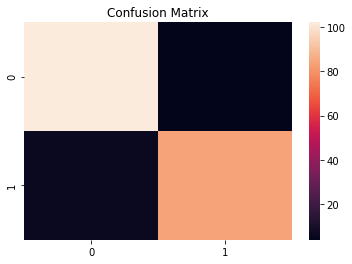

In [47]:
import seaborn as sns
sns.heatmap(data = cm)
plt.title('Confusion Matrix');

In [49]:
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy Score: ', accuracy*100,'%')

Accuracy Score:  94.41624365482234 %


In [57]:
def learning_accuracy_curve(history, epoch):

  # Training Vs Accuracy
  epoch_range = range(1, epoch + 1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend('Train','Validation', loc = 'upper left')
  

In [61]:
def learning_loss_curve(history, epoch): 
    
  # Training Vs Validation Loss
  epoch_range = range(1, epoch + 1)
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('loss')
  plt.xlabel('Epochs')
  plt.legend('Train','Validation', loc = 'upper left')

In [64]:
import warnings
warnings.filterwarnings('ignore')

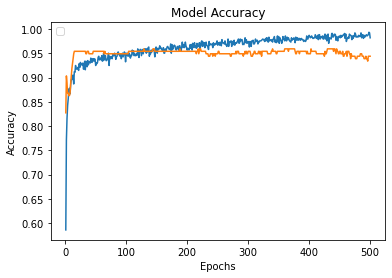

In [65]:
learning_accuracy_curve(hist, epoch = 500)

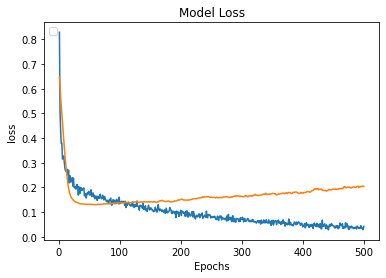

In [66]:
learning_loss_curve(hist, epoch = 500)